In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
k = 1
k2 = 0.5
m = 1
xaeq = 1
xbeq = 2
xa0 = xaeq + 0.3
xb0 = xbeq + 0.3
va0 = 0
vb0 = 0

In [53]:
N=100000
tfinal=20
xta= np.empty(N)
xta[0]=xa0
xtb= np.empty(N)
xtb[0]=xb0
vta= np.empty(N)
vta[0]=va0
vtb= np.empty(N)
vtb[0]=vb0
t= np.empty(N)
t[0] = 0
dt=tfinal/N

In [54]:
def eulercromer():
    for i in range(N-1):
        axa = (-k*(xta[i]-xaeq) - k2 * ((xta[i]-xaeq) - (xtb[i] - xbeq)))/m
        axb = (-k*(xtb[i]-xbeq) + k2 * ((xta[i]-xaeq) - (xtb[i] - xbeq)))/m

                
        vta[i+1]=vta[i]+axa*dt
        vtb[i+1]=vtb[i]+axb*dt
        
        
        xta[i+1]=xta[i]+vta[i+1]*dt
        xtb[i+1]=xtb[i]+vtb[i+1]*dt

        t[i+1] = t[i] + dt
        
    return
eulercromer()

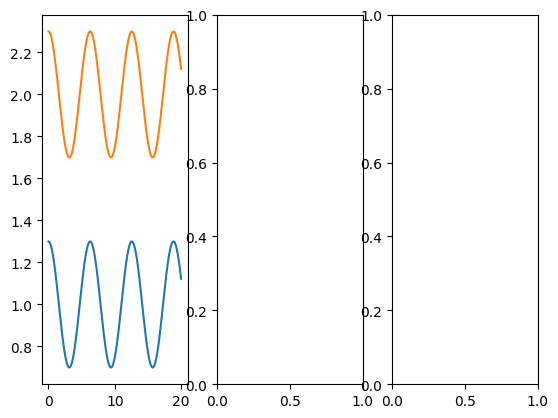

In [55]:
figure, axis = plt.subplots(1,3)
axis[0].plot(t, xta, linestyle="-")
axis[0].plot(t, xtb, linestyle="-")

In [56]:
 def abfourier(tp,xp,it0,it1,nf):
#
# cálculo dos coeficientes de Fourier a_nf e b_nf
#       a_nf = 2/T integral ( xp cos( nf w) ) dt   entre tp(it0) e tp(it1)
#       b_nf = 2/T integral ( xp sin( nf w) ) dt   entre tp(it0) e tp(it1)    
# integracao numerica pela aproximação trapezoidal
# input: matrizes tempo tp   (abcissas)
#                 posição xp (ordenadas) 
#       indices inicial it0
#               final   it1  (ao fim de um período)   
#       nf índice de Fourier
# output: af_bf e bf_nf  
# 
    dt=tp[1]-tp[0]
    per=tp[it1]-tp[it0]
    ome=2*np.pi/per

    s1=xp[it0]*np.cos(nf*ome*tp[it0])
    s2=xp[it1]*np.cos(nf*ome*tp[it1])
    st=xp[it0+1:it1]*np.cos(nf*ome*tp[it0+1:it1])
    soma=np.sum(st)
    
    q1=xp[it0]*np.sin(nf*ome*tp[it0])
    q2=xp[it1]*np.sin(nf*ome*tp[it1])
    qt=xp[it0+1:it1]*np.sin(nf*ome*tp[it0+1:it1])
    somq=np.sum(qt)
    
    intega=((s1+s2)/2+soma)*dt
    af=2/per*intega
    integq=((q1+q2)/2+somq)*dt
    bf=2/per*integq
    return (af,bf)


In [57]:
indexesa1 = [] 
for i in range(1, 31):
    indexesa1.append(abfourier(t, xta, 0, N-1, i))

In [58]:
xb0 = xbeq - 0.3
N=100000
tfinal=20
xta= np.empty(N)
xta[0]=xa0
xtb= np.empty(N)
xtb[0]=xb0
vta= np.empty(N)
vta[0]=va0
vtb= np.empty(N)
vtb[0]=vb0
t= np.empty(N)
t[0] = 0
dt=tfinal/N

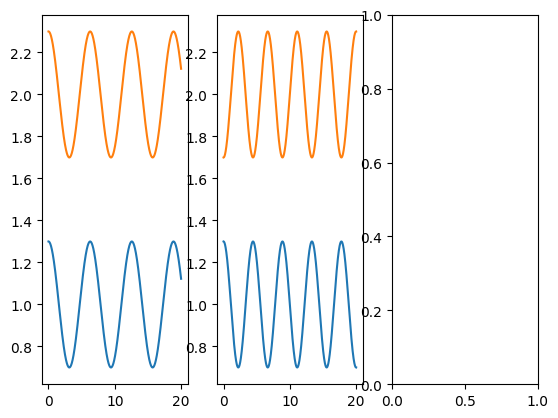

In [59]:
eulercromer()
axis[1].plot(t, xta, linestyle="-")
axis[1].plot(t, xtb, linestyle="-")
figure

In [60]:
indexesa2 = []
for i in range(1, 31):
    indexesa2.append(abfourier(t, xta, 0, N-1, i))

In [61]:
xb0 = xbeq - 0.1
N=100000
tfinal=20
xta= np.empty(N)
xta[0]=xa0
xtb= np.empty(N)
xtb[0]=xb0
vta= np.empty(N)
vta[0]=va0
vtb= np.empty(N)
vtb[0]=vb0
t= np.empty(N)
t[0] = 0
dt=tfinal/N

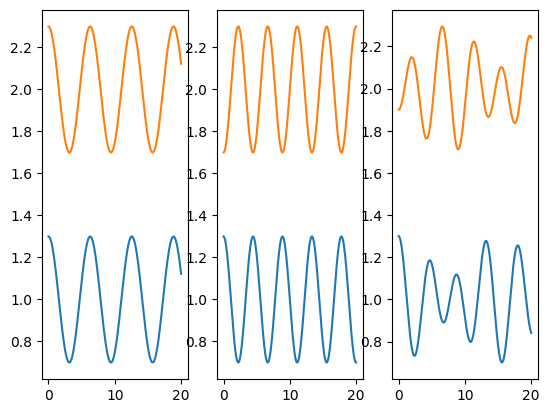

In [62]:
eulercromer()
axis[2].plot(t, xta, linestyle="-")
axis[2].plot(t, xtb, linestyle="-")
figure

In [63]:
indexesa3 = []
for i in range(1, 31):
    indexesa3.append(abfourier(t, xta, 0, N-1, i))

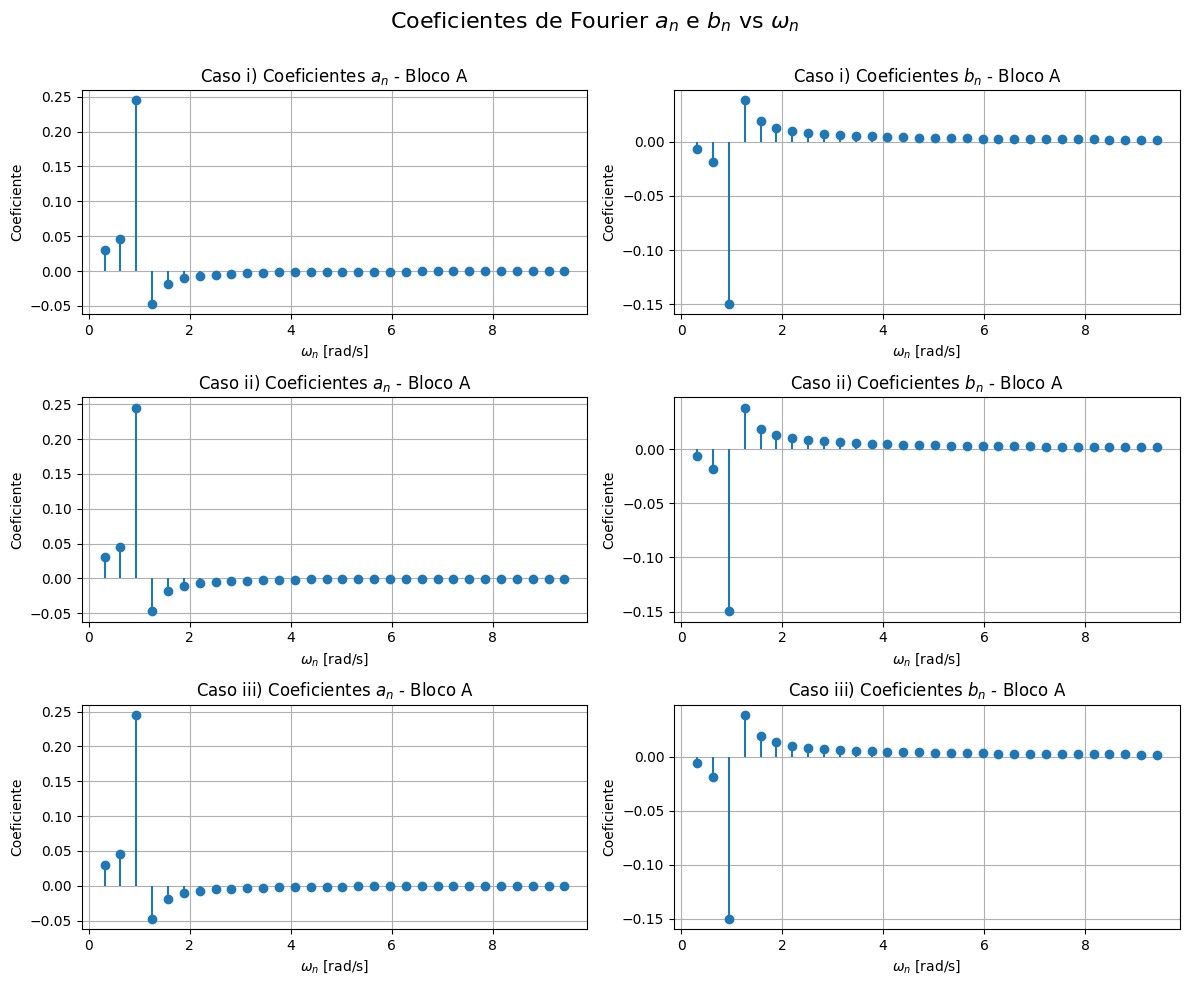

In [64]:
# Frequência fundamental
T = t[N-1] - t[0]  # período (100s)
omega = 2 * np.pi / T
n_vals = np.arange(1, 31)
omega_n = n_vals * omega

# Converter lista de tuplas (a_n, b_n) em arrays separados
def separar_coeficientes(lista):
    a_n = np.array([par[0] for par in lista])
    b_n = np.array([par[1] for par in lista])
    return a_n, b_n

# === Gráficos ===
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Coeficientes de Fourier $a_n$ e $b_n$ vs $\\omega_n$", fontsize=16)

# Caso 1
a1a, b1a = separar_coeficientes(indexesa)  # assume que você já calculou os coeficientes
axs[0, 0].stem(omega_n, a1a, basefmt=" ")
axs[0, 0].set_title("Caso i) Coeficientes $a_n$ - Bloco A")
axs[0, 1].stem(omega_n, b1a, basefmt=" ")
axs[0, 1].set_title("Caso i) Coeficientes $b_n$ - Bloco A")

# Caso 2
a2a, b2a = separar_coeficientes(indexesa)
axs[1, 0].stem(omega_n, a2a, basefmt=" ")
axs[1, 0].set_title("Caso ii) Coeficientes $a_n$ - Bloco A")
axs[1, 1].stem(omega_n, b2a, basefmt=" ")
axs[1, 1].set_title("Caso ii) Coeficientes $b_n$ - Bloco A")

# Caso 3
a3a, b3a = separar_coeficientes(indexesa)
axs[2, 0].stem(omega_n, a3a, basefmt=" ")
axs[2, 0].set_title("Caso iii) Coeficientes $a_n$ - Bloco A")
axs[2, 1].stem(omega_n, b3a, basefmt=" ")
axs[2, 1].set_title("Caso iii) Coeficientes $b_n$ - Bloco A")

# Eixos
for ax in axs.flat:
    ax.set_xlabel("$\\omega_n$ [rad/s]")
    ax.set_ylabel("Coeficiente")
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [65]:
#1
xaeq = 1
xbeq = 2
A1 = 0.3
A2 = 0
phi1 = 0
w1 = math.sqrt(k/m)
w2 = math.sqrt((k+2*k2)/m)
#phi2 é irrelevante como A2 = 0
t, xa, xb = sy.symbols("t, xa, xb")
t_vals = np.linspace(0, tfinal, N)
xa = xaeq + A1*sy.cos(w1*t + phi1)
xb = xbeq + A1*sy.cos(w1*t + phi1)

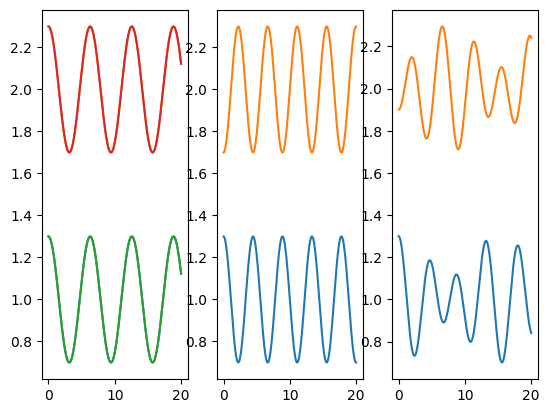

In [66]:
xafunc = sy.lambdify(t, xa, "numpy")
xbfunc = sy.lambdify(t, xb, "numpy")
axis[0].plot(t_vals, xafunc(t_vals), linestyle="-")
axis[0].plot(t_vals, xbfunc(t_vals), linestyle="-")
figure

In [67]:
#2
xaeq = 1
xbeq = 2
A1 = 0
A2 = 0.3
#phi1 é irrelevante como A1 = 0
phi2 = 0
w1 = math.sqrt(k/m)
w2 = math.sqrt((k+2*k2)/m)
t_vals = np.linspace(0, tfinal, N)
xa = xaeq + A2*sy.cos(w2*t + phi2)
xb = xbeq - A2*sy.cos(w2*t + phi2)

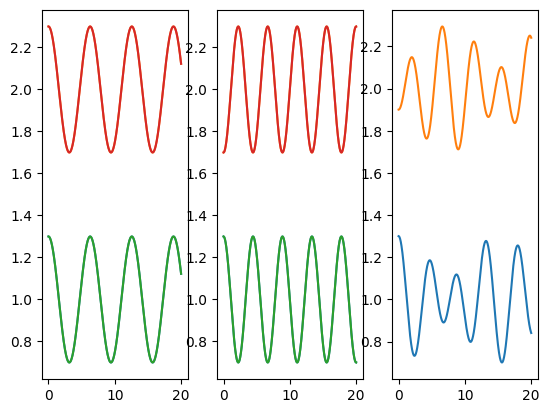

In [68]:
xafunc = sy.lambdify(t, xa, "numpy")
xbfunc = sy.lambdify(t, xb, "numpy")
axis[1].plot(t_vals, xafunc(t_vals), linestyle="-")
axis[1].plot(t_vals, xbfunc(t_vals), linestyle="-")
figure

In [69]:
#3
xaeq = 1
xbeq = 2
A1 = 0.1
A2 = 0.2
ph1 = 0
phi2 = 0
w1 = math.sqrt(k/m)
w2 = math.sqrt((k+2*k2)/m)
t_vals = np.linspace(0, tfinal, N)
xa = xaeq + A1*sy.cos(w1*t + phi1) + A2*sy.cos(w2*t + phi2)
xb = xbeq + A1*sy.cos(w1*t + phi1) - A2*sy.cos(w2*t + phi2)

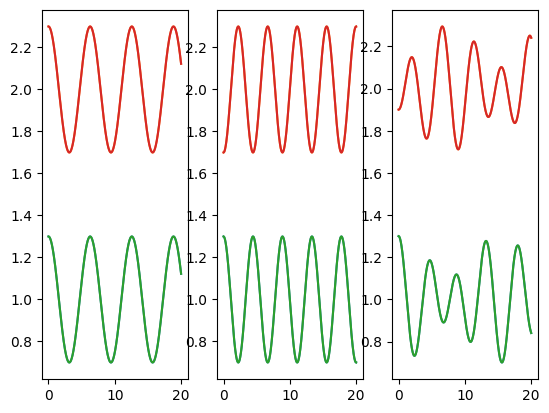

In [70]:
xafunc = sy.lambdify(t, xa, "numpy")
xbfunc = sy.lambdify(t, xb, "numpy")
axis[2].plot(t_vals, xafunc(t_vals), linestyle="-")
axis[2].plot(t_vals, xbfunc(t_vals), linestyle="-")
figure